In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./Data/creditcard.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [2]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
251075,155200.0,-0.341430,1.210184,-0.327207,-0.654354,0.853024,-0.803133,1.044556,-0.262914,0.216322,...,0.270103,1.049085,-0.326793,-0.681109,-0.274516,-0.114259,0.431144,0.326889,0.89,0
38856,39583.0,0.995645,-0.557056,1.021863,0.341870,-1.188178,-0.439818,-0.438462,-0.082235,0.702884,...,0.157762,0.404638,-0.147241,0.530972,0.212330,1.091340,-0.049712,0.038702,126.00,0
10974,18877.0,1.267123,-0.250328,0.825573,-0.643521,-0.841827,-0.455364,-0.629952,-0.109377,3.069478,...,-0.186091,-0.037425,-0.105609,-0.176311,0.560963,-0.694622,0.067288,0.026350,11.85,0
42078,40949.0,1.060149,-1.223162,1.248982,-0.557835,-1.924919,-0.134813,-1.242821,0.172026,-0.435686,...,-0.045270,0.070181,-0.036354,0.366162,-0.123150,1.086455,-0.029466,0.036989,125.90,0
97297,66153.0,-0.815828,-0.982805,0.432877,-1.029453,-1.220841,0.693078,1.632840,-0.037224,-1.752095,...,-0.079404,-0.384908,0.794236,-0.306399,0.105187,1.071274,-0.173803,0.016129,414.96,0


In [3]:
df.Class.unique()

array([0, 1])

In [4]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
features = df.columns[0:30]
target   = df.columns[-1]
print(f"Caracteristicas = {features}")
print(f"Target = {target}")

Caracteristicas = Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Target = Class


In [6]:
X = df[features].to_numpy()
print(f"Tamaño de nuestro dataset inicial: {X.shape}")

Tamaño de nuestro dataset inicial: (284807, 30)


In [7]:
y = df[target].to_numpy()
print(f"Tamaño de etiquetas iniciales: {y.shape}")

Tamaño de etiquetas iniciales: (284807,)


In [8]:
# el paquete se llama scikit-learn
# pip install scikit-learn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(f"Tamaño dataset entrenamiento: {X_train.shape}")
print(f"Tamaño dataset test: {X_test.shape}")

Tamaño dataset entrenamiento: (199364, 30)
Tamaño dataset test: (85443, 30)


In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier()
classifier_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
y_predict = classifier_tree.predict(X_test)
print(f"Numero de operaciones en test: {y_test.shape}")
print(f"Numero de operaciones 'Legales' en test: {y_test.shape[0]-np.sum(y_test)}")
print(f"Numero de operacioens 'Fraude' en test:  {np.sum(y_test)}")
print(f"Numero de veces que se ha equivocado mi sistema: {np.sum(np.abs(y_test-y_predict))}")

Numero de operaciones en test: (85443,)
Numero de operaciones 'Legales' en test: 85282
Numero de operacioens 'Fraude' en test:  161
Numero de veces que se ha equivocado mi sistema: 75


In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[85239    43]
 [   32   129]]


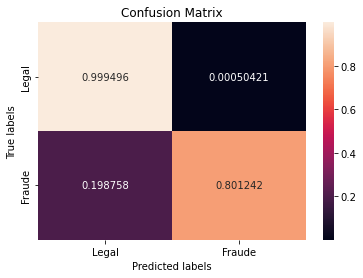

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm_normalized = np.array([cm[0]/cm.sum(axis=1)[0], cm[1]/cm.sum(axis=1)[1]])
sns.heatmap(cm_normalized, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Legal', 'Fraude']); ax.yaxis.set_ticklabels(['Legal', 'Fraude']);